# CSE3001 Assignment

### Assignment due date: Friday 27 October 2023 by 11:59 pm (AEST/AEDT)

Penalties are applied to late assignments (accepted up to 5 business days after the due date only). Five percent is deducted per business day late. A mark of zero will be assigned to assignments submitted more than 5 days late.

<font color='red'> This is an individual assignment. You are not permitted to work as a part of a group when writing this assignment. </font>

### Assignment submission

Please zip all `*.ipynb`, `*.py`, `*.docx` and `*.xlsx` files into a single zip file and submit the zipped file via the link provided on LMS.

### Copying, Plagiarism
Plagiarism is the submission of somebody else’s work in a manner that gives the impression that the work is your own. For individual assignments, plagiarism includes the case where two or more students work collaboratively on the assignment.  The Department of Computer Science and Information Technology treats plagiarism very seriously.  When it is detected, penalties are strictly imposed.

### ChatGPT
A key purpose of this assessment task is to test your own ability to complete the assigned tasks.  Therefore, the use of ChatGPT, AI tools or chatbots with similar functionality is prohibited for this assessment task. Students who are found to be in breach of this rule will be subject to normal academic misconduct measures.  Additionally, students may be engaged to provide an oral validation of their understanding of their submitted work (e.g. coding).




# Introduction

**DESCRIPTION:** In this assignment we have provided you with skeleton code. You have an image dataset, and you must train a deep learning model for it. All of the code required has already been shown to you in the labs.

In this assignment you will be required to write code and write short answer responses to questions in a structured report. You have been provided with a template Word document of this report in which you simply have to fill in the blanks (1-3 sentences is expected).

Throughout this assignment, there are a few challenge questions worth bonus marks. There are a total of 97 marks possible before challenge questions. You can receive up to 6 marks from at most 2 challenge questions, so the maximum number of marks you can get is 103. However if you get over 100 marks the actual mark you will receive is 100% for the assignment assessment component of your grades. Unless otherwise stated all marks quoted do not include challenge questions.

There are 61 marks associated with code, 21 marks associated with the short answer part of the report, and 15 marks associated with the experimentation part of the report.

**INSTRUCTIONS:**

1.   Copy the skeleton files to your Google Drive.
2.   Edit `SKELETON_DIR` in the first cell to point to the skeleton files you uploaded in step 1. The provided code assumes you have uploaded them to "Uni/CSE3001/Assignment" in your Google Drive.
3.   Run the following two cells


In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Set the working directory for the assignment
import os
SKELETON_DIR = '/content/drive/My Drive/Assignment_DL'
os.chdir(SKELETON_DIR)
! mkdir -p "$SKELETON_DIR/saved_models"
! mkdir -p "$SKELETON_DIR/logs"

# Set up auto-reloading modules from the working directory
%load_ext autoreload
%autoreload 2

# Install extra dependencies
!pip install -q wandb==0.15.0
!pip install -q torchmetrics==0.11.3
1
# Set the default figure size
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 25.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 kB 9.2 MB/s eta 0:00:00


In [2]:
%%shell
DATA_URL='https://latrobeuni-my.sharepoint.com/:u:/g/personal/zhe_ltu_edu_au/Edn2-_XuX2pGptMfH6eVLIoB16_ofpRlZnCf6rwP47EkBQ?e=ogAWGM&download=1'

pushd /content
wget -O data.zip $DATA_URL
unzip -q data.zip
popd


/content /content/drive/My Drive/Assignment_DL
--2023-10-27 10:35:03--  https://latrobeuni-my.sharepoint.com/:u:/g/personal/zhe_ltu_edu_au/Edn2-_XuX2pGptMfH6eVLIoB16_ofpRlZnCf6rwP47EkBQ?e=ogAWGM&download=1
Resolving latrobeuni-my.sharepoint.com (latrobeuni-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to latrobeuni-my.sharepoint.com (latrobeuni-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/zhe_ltu_edu_au/Documents/CSE5DL%20data/data.zip?ga=1 [following]
--2023-10-27 10:35:04--  https://latrobeuni-my.sharepoint.com/personal/zhe_ltu_edu_au/Documents/CSE5DL%20data/data.zip?ga=1
Reusing existing connection to latrobeuni-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1043211099 (995M) [application/x-zip-compressed]
Saving to: ‘data.zip’

data.zip            100%[===================>] 994.88M  63.8MB/s    in 23s     

2023-10-27 10:35:27 (43.7 MB/s

# Task 1 - Image Classification

**MARKS**: 97

In this first task, you will create a deep learning model to classify images of skin lesions into one of seven classes:

1.   "MEL" = Melanoma
2.   "NV" = Melanocytic nevus
3.   "BCC" = Basal cell carcinoma
4.   "AKIEC" = Actinic keratosis
5.   "BKL" = Benign keratosis
6.   "DF" = Dermatofibroma
7.   "VASC" = Vascular lesion

The data for this task is a subset of: https://challenge2018.isic-archive.com/task3/

The data for this task is inside the `/content/data/img` folder. It contains ~3,800 images named like `ISIC_000000.jpg` and the following label files:

*   `/content/data/img/train.csv`
*   `/content/data/img/val.csv`
*   `/content/data/img/train_small.csv`
*   `/content/data/img/val_small.csv`

The `small` versions are the first 200 lines of each partition and are included for debugging purposes. To save time, ensure your code runs on the `small` versions first.

**NOTE**: To explore the labels, you can click the above hyperlinks to open the relevant csv file.

## Task 1a. Explore the training set

**MARKS**: 8 (Code 6, Reports 2)

**INSTRUCTIONS**: Check for data issues, as we have done in the labs. Check the class distribution and at least 1 other potential data issue. Hint: Look in `explore.py` for a function that can plot the class distribution.

**REPORT**: What did you check for? What data issues are present in this dataset?

**HINT**: This task primarily requires "PyTorch Basics" lab.

In [3]:
import pandas as pd

IMG_CLASS_NAMES = ["MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"]

train_df = pd.read_csv('/content/data/img/train.csv')
val_df = pd.read_csv('/content/data/img/val.csv')
train_df.head()


,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
val_df.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0027310,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,ISIC_0027311,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0027312,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0027313,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0027314,0.0,1.0,0.0,0.0,0.0,0.0,0.0


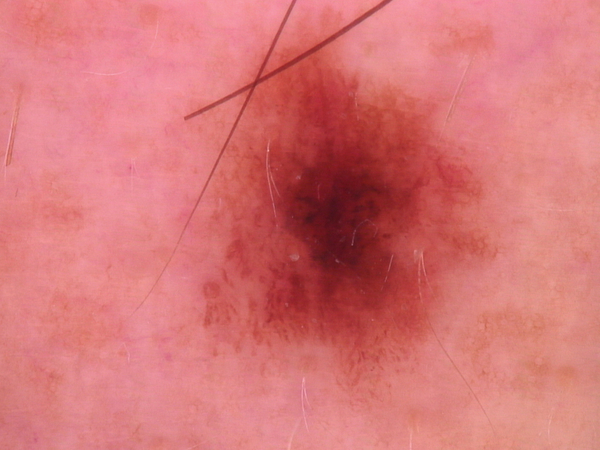

In [5]:
from PIL import Image
# Change the filename to view other examples from the dataset
display(Image.open('/content/data/img/ISIC_0024306.jpg'))

[1 1 1 ... 1 1 1]
[4 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 4 0 0 1 1 1 4 1 3 4 1 2 1 1 1 1 1 3 4 1 1
 1 1 1 0 1 0 1 4 4 1 1 1 0 1 1 1 1 1 2 1 4 1 1 4 2 1 1 4 1 1 1 1 1 1 1 1 1
 1 6 1 0 4 1 1 1 4 1 4 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 4 0
 1 1 1 1 2 1 1 4 1 1 1 1 2 1 4 0 4 1 1 1 1 0 1 1 1 1 3 1 1 1 4 3 1 4 4 1 1
 1 1 1 1 1 4 1 1 1 1 1 1 4 1 1 2 1 1 1 1 2 1 0 1 1 1 1 1 1 0 5 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 4 1 3 0 1 4 1 1 1 4 1 1 1 0 1 1 1 1 6 1 1 2 2 4 1 3 1 2
 1 4 1 1 3 1 1 1 1 1 1 1 2 2 2 1 1 1 3 1 0 1 1 1 1 1 1 4 0 0 3 6 1 1 1 1 1
 1 1 1 1 0 1 1 1 3 1 1 3 1 1 1 4 1 1 1 3 1 0 1 1 1 1 2 1 1 5 1 1 2 1 1 0 1
 4 1 4 2 1 1 4 5 1 3 0 1 1 1 0 1 0 1 1 1 5 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 5 4 3 0 4 1 1 1 1 1 1 0 1 1 1 0 1 6 1 1 3 0 1 1 6 0 1 2 1 2 3 1
 4 4 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 3 1 0 1 2 1 4 1 3 1]


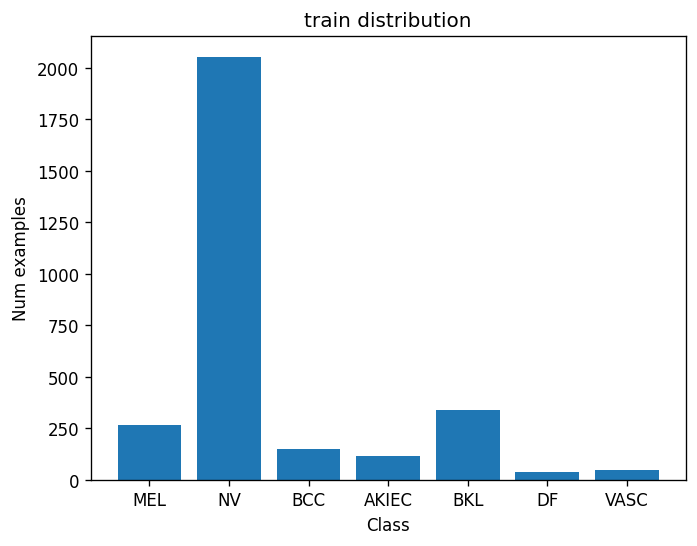

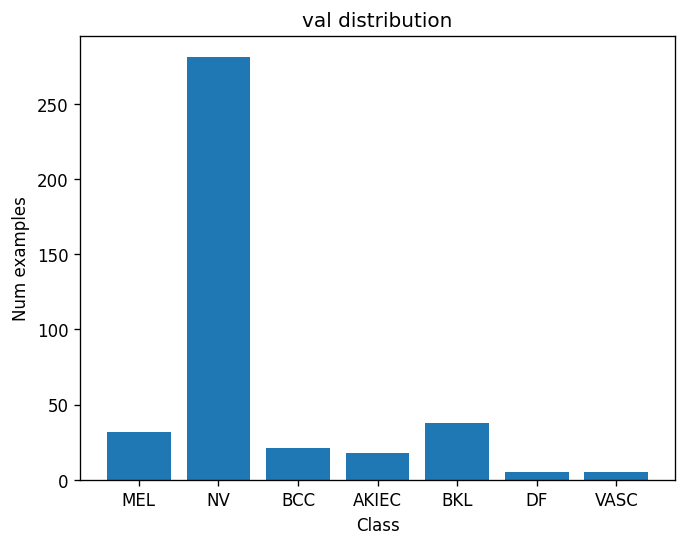

In [6]:
import explore

# TODO - Check for data issues
# Hint: You can convert from one-hot to integers with argmax
#       This way you can convert 1, 0, 0, 0, 0, 0, 0  to class 0
#                                0, 1, 0, 0, 0, 0, 0  to class 1
#                                0, 0, 1, 0, 0, 0, 0  to class 2
# so it should be something like the following:
# train_labels = train_df.values[....].argmax(....)
# val_labels = val_df.values[....].argmax(....)
#     - you need to fill in the ... parts with the correct values.
# You should then print output the contents of train_labels to see if
# it matches the contents of train.csv

train_labels = train_df.values[:, 1:].argmax(axis=1)
val_labels = val_df.values[:, 1:].argmax(axis=1)

print(train_labels)
print(val_labels)
#
# Next you can plot the class distributions like the following:
# explore.plot_label_distribution(....)
#    - do the above for both the train and val labels.

explore.plot_label_distribution(train_labels, 'train', IMG_CLASS_NAMES)
explore.plot_label_distribution(val_labels, 'val', IMG_CLASS_NAMES)


#
# Following this look for other potential problems with the data
#   You can look at lab 2a to see what was checked there.
#   You may also think of any other potential problems with the data.


In [7]:
train_df.isnull().sum()

image    0
MEL      0
NV       0
BCC      0
AKIEC    0
BKL      0
DF       0
VASC     0
dtype: int64

In [8]:
val_df.isnull().sum()

image    0
MEL      0
NV       0
BCC      0
AKIEC    0
BKL      0
DF       0
VASC     0
dtype: int64

## Task 1b. Implement Training loop

**MARKS**: 22 (Code 20, Reports 2)

**INSTRUCTIONS**:

*   Implement LesionDataset in `datasets.py`. Use the cell below to test your implementation.
*   Implement the incomplete functions in `train.py` marked as "Task 1b"
*   Go to the [Model Training Cell](#task-1-model-training) at the end of Task 1 and fill in the required code for "Task 1b".

**REPORT**: Why should you *not use* `random_split` in your code here?

**HINT**: This task primarily requires "PyTorch Basics" lab.

In [9]:
import datasets

ds = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/train.csv')
input, label = ds[0]
print(input)
print(label)


tensor([[[0.7725, 0.7765, 0.7765,  ..., 0.8431, 0.8431, 0.8471],
         [0.7686, 0.7725, 0.7725,  ..., 0.8471, 0.8471, 0.8471],
         [0.7686, 0.7686, 0.7725,  ..., 0.8471, 0.8471, 0.8471],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.2863, 0.2902, 0.2902,  ..., 0.4353, 0.4353, 0.4392],
         [0.2902, 0.2902, 0.2902,  ..., 0.4314, 0.4314, 0.4314],
         [0.2902, 0.2902, 0.2902,  ..., 0.4314, 0.4314, 0.4314],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.2824, 0.2824, 0.2824,  ..., 0.4196, 0.4196, 0.4196],
         [0.2824, 0.2824, 0.2824,  ..., 0.4235, 0.4235, 0.4235],
         [0.2824, 0.2824, 0.2824,  ..., 0.4275, 0.4275, 0.

## Task 1c. Implement a baseline convolutional neural network

**MARKS**: 25 (Code 18, Reports 7)

You will implement a baseline convolutional neural network which you can compare results to. This allows you to evaluate any improvements made by hyperparameter tuning or transfer learning.

**INSTRUCTIONS**:

*   Implement a `SimpleBNConv` in `models.py` with:
    *   5 `nn.Conv2d` layers, with 8, 16, 32, 64, 128 output channels respectively, with the following between each convolution layer:
        *   `nn.ReLU()` for the activation function, and
        *   `nn.BatchNorm2d`, and
        *   finally a `nn.MaxPool2d` to downsample by a factor of 2.
*   Use a normalised confusion matrix on the model's validation predictions in `train.py`.
*  Go to the [Model Training Cell](#task-1-model-training) at the end of Task 1 and fill in the required code to train the model.

Training should take about 1 minute/epoch. Validation accuracy should be 60-70%, but UAR should be around 20-40%.

**REPORT**: As training sets get larger, the length of time per epoch also gets larger. Some datasets take over an hour per epoch. This makes it impractical to debug typos in your code since it can take hours after starting for the program to reach new code. Name two ways to significantly reduce how long **each** epoch takes - for debugging purposes - while still using real data and using the real training code.

**REPORT**: Show the confusion matrix and plots of the validation accuracy and UAR in your report, and explain what is going wrong.
(Right-click a plot and select "save image as..." to save the image to your computer)

**HINT**: This task primarily requires "Convolutional Neural Networks" lab.

In [10]:
from models import CNNModel
import torch

batch = next(iter(ds))
input, label = batch

input = torch.unsqueeze(input, 0)

model = CNNModel()
output = model(input.float())
print(output.shape)

torch.Size([1, 32256])


In [11]:
from models import CNNModel
import torch

batch = next(iter(ds))
input, label = batch

input = torch.unsqueeze(input, 0)

print(input.shape)

model = CNNModel()
output = model(input.float())
print(output.shape)


torch.Size([1, 3, 450, 600])
torch.Size([1, 7])


## Task 1d. Account for data issues

**MARKS**: 12 (Code 8, Reports 4)

**INSTRUCTIONS**: Account for the data issues in Task 1a and retrain your model.

**REPORT**: How did you account for the data issues? Was it effective? How can you tell? Show another confusion matrix.

**IMPORTANT NOTE**: One of the techniques from the lab will cause a warning in the metric calculation on `train_small.csv`, but will work fine on `train.csv`.

**HINT**: This task primarily requires "Debugging Neural Networks" lab.

## Task 1e. Data Augmentation

**MARKS**: 10 (Code 4, Reports 6)

**INSTRUCTIONS**:

*   Add an `augment` flag to LesionDataset which specifies whether any augmentation is done to the images. Ensure it is set to `True` *only* for the training dataset.
*   Use random horizontal flips
*   Use at least 2 other different non-deterministic augmentations

**REPORT:** Are random vertical flips appropriate for this dataset? Why?

Using data augmentation does not guarantee improved model performance. Data augmentation can hurt test performance by making the model train on unrealistic images.

**REPORT**: What effect did Data Augmentation have on performance? Show a screenshot of the relevant graphs from Weights & Biases for evidence.

**CHALLENGE**: (3 marks) Apply 5 crop augmentation with crop size 200x300. Make a distinct model which uses 5 crops at once to give a single answer. Include in your report how you did this and report the effect on performance.

**HINT**: This task primarily requires "Image Augmentation" lab.

## Task 1f. Chase improved performance

**MARKS**: 20 (Code and reports)

**INSTRUCTIONS**:
*   Create a model from a pre-trained model from the torchvision model zoo. We recommend Resnet18, but you may use any model you like. You may freeze the weights of all layers except the last, or fine-tune all the weights. https://drive.google.com/file/d/12Bq-00qRNTBxzGZ9X_iqWndluB5hmuG1/view?usp=share_link
*   Create your own models, modifying the model architecture, try different losses, learning rates. Change anything you like except the evaluation metrics in search of a better model.

Train at least 10 different models, each with a different combination.

**REPORT**: Create a table in an excel spreadsheet that is similar to that used in Lab 3 to record your results. Make sure it includes every parameter of variation between your combinations as a separate column. Include notes about what you were thinking/hoping for each combination as a number column in the spreadsheet.

In addition to the excel spreadsheet generate a report using Weights and Biases of the models you trained and the performance curves. Save the report as a pdf and include this in your submission. Please see this link on how to generate reports with Weights and Biases. https://docs.wandb.ai/guides/reports

Play around with Weights and Biases to see what cool features you can dig out and use to better visualize the training results and use that to improve the information shared via the report.

**Important**: Write a discussion about the key findings from the experimental results. What worked? What didn't? You don't need to be correct, you just need to put forward a coherent and consistent argument based on your observed results.

**CHALLENGE REPORT**: (3 marks) Assuming you use the full dataset in a single epoch, if you halve the size of the batch size, what happens to the number of times that you update the weights per epoch? With reference to the gradients, under what circumstances is this good?

**HINT**: The first part of this task primarily requires "Transfer Learning" lab.

<a name="task-1-model-training"></a>
## Model Training Cell

Based on what you have implemented in the above sections, you can try to complete the whole training process here.


wandb: Currently logged in as: jastifythemeans (wakanding). Use `wandb login --relogin` to force relogin


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MeanMetric was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassAccuracy was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassRecall was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)


Accuracy_train,▁▄▆▇█
Accuracy_val,▁▂▃▅█
Loss_train,█▃▂▁
Loss_val,█▂▁▁▁
Rec_train,▁▄▆▇█
UAR_val,▁▂▃▅█
Accuracy_train,0.35163
Accuracy_val,0.39453
Loss_train,0.74013
Loss_val,0.81448
Rec_train,0.35163


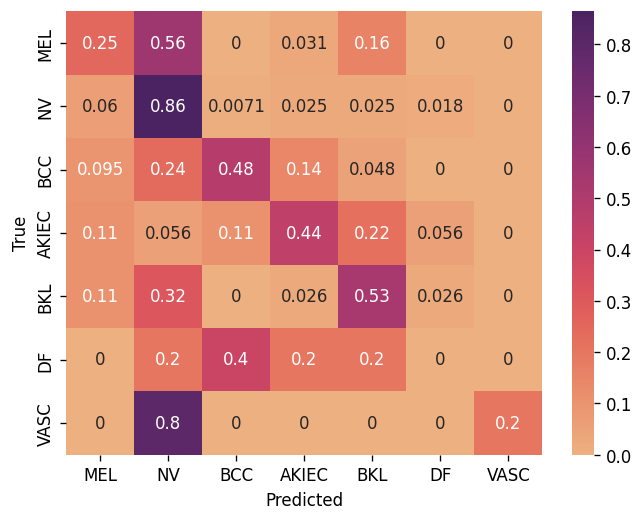

In [13]:
#Ran twice for model 3 for task 1F

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

import datasets
from models import CNNModel
import train

torch.manual_seed(42)

NUM_EPOCHS = 5
BATCH_SIZE = 64

# Create datasets/loaders
# TODO Task 1b - Create the data loaders from LesionDatasets
train_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/train.csv')
val_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/val.csv')

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Instantiate model, optimizer and criterion
# TODO Task 1c - Make an instance of your model

model = CNNModel()


optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Train model
# TODO Task 1c: Set ident_str to a string that identifies this particular
#               training run. Note this line in the training code
#                     exp_name = f"{model.__class__.__name__}_{ident_str}"
#               So it means the the model class name is already included in the
#               exp_name string. You can consider adding other information
#               particular to this training run, e.g. learning rate (lr) used,
#               augmentation (aug) used or not, etc.

train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE3001 Assignment Task 1",
                  ident_str= "Task 1c run")

wandb: Currently logged in as: jastifythemeans (wakanding). Use `wandb login --relogin` to force relogin


Train data - ML proportion: 0.089 NV proportion: 0.683 BCC proportion: 0.050 AKIEC proportion: 0.038 BKL proportion: 0.113 DF proportion: 0.012 VASC proportion: 0.015


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MeanMetric was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassAccuracy was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassRecall was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)


Accuracy_train,▁▃▄▆█
Accuracy_val,▁▁▅▅█
Loss_train,█▄▃▁
Loss_val,█▂▁▂▂
Rec_train,▁▃▄▆█
UAR_val,▁▁▅▅█
Accuracy_train,0.83078
Accuracy_val,0.40684
Loss_train,0.27973
Loss_val,0.84334
Rec_train,0.83078


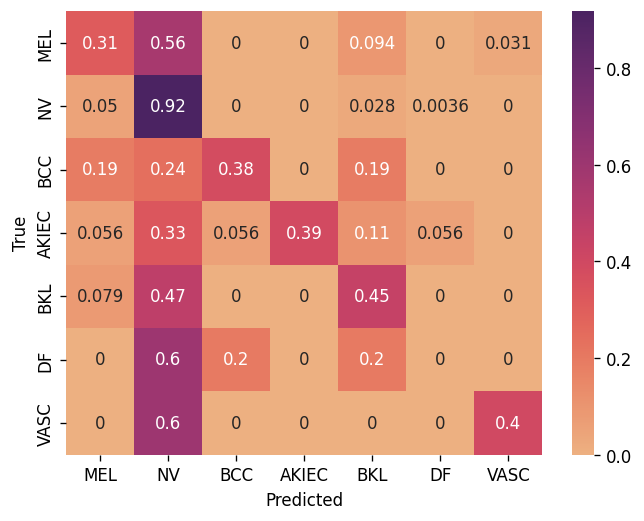

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

import datasets
from models import CNNModel
import train
import numpy as np

torch.manual_seed(42)

NUM_EPOCHS = 5
BATCH_SIZE = 64

# Create datasets/loaders
# TODO Task 1b - Create the data loaders from LesionDatasets
train_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/train.csv')
val_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/val.csv')




# TODO Task 1d - Account for data issues, if applicable
train_ML_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["MEL"]))) / len(train_dataset.labels_fname["MEL"])
train_NV_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["NV"]))) / len(train_dataset.labels_fname["NV"])
train_BCC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["BCC"]))) / len(train_dataset.labels_fname["BCC"])
train_AKIEC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["AKIEC"]))) / len(train_dataset.labels_fname["AKIEC"])
train_BKL_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["BKL"]))) / len(train_dataset.labels_fname["BKL"])
train_DF_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["DF"]))) / len(train_dataset.labels_fname["DF"])
train_VASC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["VASC"]))) / len(train_dataset.labels_fname["VASC"])

print("Train data - ML proportion:", "{:.3f}".format(train_ML_proportion), "NV proportion:", "{:.3f}".format(train_NV_proportion), "BCC proportion:", "{:.3f}".format(train_BCC_proportion), "AKIEC proportion:",
      "{:.3f}".format(train_AKIEC_proportion), "BKL proportion:", "{:.3f}".format(train_BKL_proportion), "DF proportion:", "{:.3f}".format(train_DF_proportion), "VASC proportion:", "{:.3f}".format(train_VASC_proportion))

ML_weight = 1 - train_ML_proportion
NV_weight = 1 - train_NV_proportion
BCC_weight = 1 - train_BCC_proportion
AKIEC_weight = 1 - train_AKIEC_proportion
BKL_weight = 1 - train_BKL_proportion
DF_weight = 1 - train_DF_proportion
VASC_weight = 1 - train_VASC_proportion

weights = []
for i in train_dataset.labels_fname:

  if i == 0:
    weights.append(ML_weight)

  elif i == 1:
    weights.append(NV_weight)

  elif i == 2:
    weights.append(BCC_weight)

  elif i == 3:
    weights.append(AKIEC_weight)

  elif i == 4:
    weights.append(BKL_weight)

  elif i == 5:
    weights.append(DF_weight)

  else:
    weights.append(VASC_weight)


sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(train_dataset))
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


# Instantiate model, optimizer and criterion
# TODO Task 1c - Make an instance of your model
model = CNNModel()



# TODO Task 1d - Account for data issues, if applicable



optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Train model
# TODO Task 1c: Set ident_str to a string that identifies this particular
#               training run. Note this line in the training code
#                     exp_name = f"{model.__class__.__name__}_{ident_str}"
#               So it means the the model class name is already included in the
#               exp_name string. You can consider adding other information
#               particular to this training run, e.g. learning rate (lr) used,
#               augmentation (aug) used or not, etc.

train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE3001 Assignment Task 1",
                  ident_str= "task 1d run")

Train data - ML proportion: 0.089 NV proportion: 0.683 BCC proportion: 0.050 AKIEC proportion: 0.038 BKL proportion: 0.113 DF proportion: 0.012 VASC proportion: 0.015


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MeanMetric was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassAccuracy was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassRecall was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)


Accuracy_train,▁▄▆▇█
Accuracy_val,▁▂▃▅█
Loss_train,█▃▂▁
Loss_val,█▂▁▁▁
Rec_train,▁▄▆▇█
UAR_val,▁▂▃▅█
Accuracy_train,0.35327
Accuracy_val,0.39301
Loss_train,0.7399
Loss_val,0.81925
Rec_train,0.35327


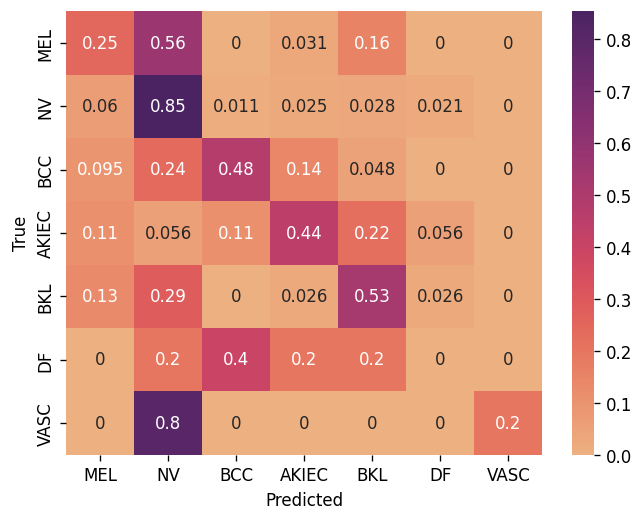

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

import datasets
from models import CNNModel
import train
import numpy as np

torch.manual_seed(42)

NUM_EPOCHS = 5
BATCH_SIZE = 64

# Create datasets/loaders
# TODO Task 1b - Create the data loaders from LesionDatasets
train_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/train.csv')
val_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/val.csv')




# TODO Task 1d - Account for data issues, if applicable
train_ML_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["MEL"]))) / len(train_dataset.labels_fname["MEL"])
train_NV_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["NV"]))) / len(train_dataset.labels_fname["NV"])
train_BCC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["BCC"]))) / len(train_dataset.labels_fname["BCC"])
train_AKIEC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["AKIEC"]))) / len(train_dataset.labels_fname["AKIEC"])
train_BKL_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["BKL"]))) / len(train_dataset.labels_fname["BKL"])
train_DF_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["DF"]))) / len(train_dataset.labels_fname["DF"])
train_VASC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["VASC"]))) / len(train_dataset.labels_fname["VASC"])

print("Train data - ML proportion:", "{:.3f}".format(train_ML_proportion), "NV proportion:", "{:.3f}".format(train_NV_proportion), "BCC proportion:", "{:.3f}".format(train_BCC_proportion), "AKIEC proportion:",
      "{:.3f}".format(train_AKIEC_proportion), "BKL proportion:", "{:.3f}".format(train_BKL_proportion), "DF proportion:", "{:.3f}".format(train_DF_proportion), "VASC proportion:", "{:.3f}".format(train_VASC_proportion))

ML_weight = 1 - train_ML_proportion
NV_weight = 1 - train_NV_proportion
BCC_weight = 1 - train_BCC_proportion
AKIEC_weight = 1 - train_AKIEC_proportion
BKL_weight = 1 - train_BKL_proportion
DF_weight = 1 - train_DF_proportion
VASC_weight = 1 - train_VASC_proportion

weights = []
for i in train_dataset.labels_fname:

  if i == 0:
    weights.append(ML_weight)

  elif i == 1:
    weights.append(NV_weight)

  elif i == 2:
    weights.append(BCC_weight)

  elif i == 3:
    weights.append(AKIEC_weight)

  elif i == 4:
    weights.append(BKL_weight)

  elif i == 5:
    weights.append(DF_weight)

  else:
    weights.append(VASC_weight)


sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(train_dataset))
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


# Instantiate model, optimizer and criterion
# TODO Task 1c - Make an instance of your model
model = CNNModel()



# TODO Task 1d - Account for data issues, if applicable



optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Train model
# TODO Task 1c: Set ident_str to a string that identifies this particular
#               training run. Note this line in the training code
#                     exp_name = f"{model.__class__.__name__}_{ident_str}"
#               So it means the the model class name is already included in the
#               exp_name string. You can consider adding other information
#               particular to this training run, e.g. learning rate (lr) used,
#               augmentation (aug) used or not, etc.

train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE3001 Assignment Task 1",
                  ident_str= "task 1e run")

Train data - ML proportion: 0.089 NV proportion: 0.683 BCC proportion: 0.050 AKIEC proportion: 0.038 BKL proportion: 0.113 DF proportion: 0.012 VASC proportion: 0.015


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 107MB/s]


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MeanMetric was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassAccuracy was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassRecall was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)


Accuracy_train,▁▇███
Accuracy_val,▃▁▁▁█
Loss_train,█▄▂▁
Loss_val,█▃▂▂▁
Rec_train,▁▇███
UAR_val,▃▁▁▁█
Accuracy_train,0.14911
Accuracy_val,0.16491
Loss_train,0.946
Loss_val,0.88498
Rec_train,0.14911


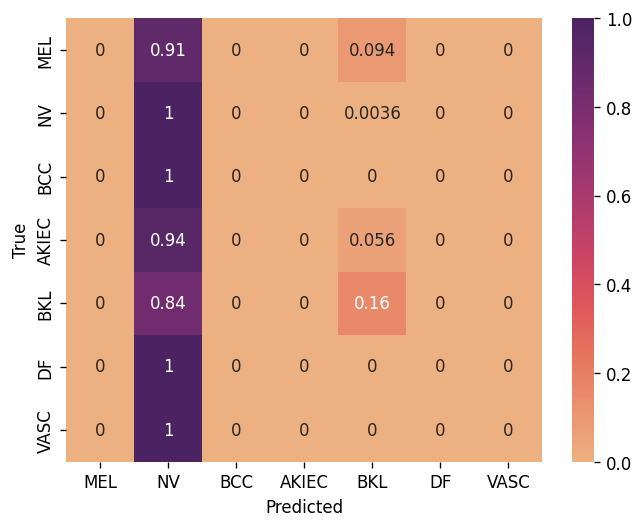

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

import datasets
from models import construct_resnet18
import train
import numpy as np

torch.manual_seed(42)

NUM_EPOCHS = 5
BATCH_SIZE = 64

# Create datasets/loaders
# TODO Task 1b - Create the data loaders from LesionDatasets
train_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/train.csv')
val_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/val.csv')




# TODO Task 1d - Account for data issues, if applicable
train_ML_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["MEL"]))) / len(train_dataset.labels_fname["MEL"])
train_NV_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["NV"]))) / len(train_dataset.labels_fname["NV"])
train_BCC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["BCC"]))) / len(train_dataset.labels_fname["BCC"])
train_AKIEC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["AKIEC"]))) / len(train_dataset.labels_fname["AKIEC"])
train_BKL_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["BKL"]))) / len(train_dataset.labels_fname["BKL"])
train_DF_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["DF"]))) / len(train_dataset.labels_fname["DF"])
train_VASC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["VASC"]))) / len(train_dataset.labels_fname["VASC"])

print("Train data - ML proportion:", "{:.3f}".format(train_ML_proportion), "NV proportion:", "{:.3f}".format(train_NV_proportion), "BCC proportion:", "{:.3f}".format(train_BCC_proportion), "AKIEC proportion:",
      "{:.3f}".format(train_AKIEC_proportion), "BKL proportion:", "{:.3f}".format(train_BKL_proportion), "DF proportion:", "{:.3f}".format(train_DF_proportion), "VASC proportion:", "{:.3f}".format(train_VASC_proportion))

ML_weight = 1 - train_ML_proportion
NV_weight = 1 - train_NV_proportion
BCC_weight = 1 - train_BCC_proportion
AKIEC_weight = 1 - train_AKIEC_proportion
BKL_weight = 1 - train_BKL_proportion
DF_weight = 1 - train_DF_proportion
VASC_weight = 1 - train_VASC_proportion

weights = []
for i in train_dataset.labels_fname:

  if i == 0:
    weights.append(ML_weight)

  elif i == 1:
    weights.append(NV_weight)

  elif i == 2:
    weights.append(BCC_weight)

  elif i == 3:
    weights.append(AKIEC_weight)

  elif i == 4:
    weights.append(BKL_weight)

  elif i == 5:
    weights.append(DF_weight)

  else:
    weights.append(VASC_weight)


sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(train_dataset))
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


# Instantiate model, optimizer and criterion
# TODO Task 1c - Make an instance of your model
#model = CNNModel()

model = construct_resnet18()





# TODO Task 1d - Account for data issues, if applicable



optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Train model
# TODO Task 1c: Set ident_str to a string that identifies this particular
#               training run. Note this line in the training code
#                     exp_name = f"{model.__class__.__name__}_{ident_str}"
#               So it means the the model class name is already included in the
#               exp_name string. You can consider adding other information
#               particular to this training run, e.g. learning rate (lr) used,
#               augmentation (aug) used or not, etc.

train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE3001 Assignment Task 1",
                  ident_str= "resnet18 run")

In [ ]:
from models import CustomModel
import torch

batch = next(iter(ds))
input, label = batch

input = torch.unsqueeze(input, 0)

model = CustomModel()
output = model(input.float())
print(output.shape)

torch.Size([1, 512])


Train data - ML proportion: 0.089 NV proportion: 0.683 BCC proportion: 0.050 AKIEC proportion: 0.038 BKL proportion: 0.113 DF proportion: 0.012 VASC proportion: 0.015


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MeanMetric was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassAccuracy was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassRecall was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)


Accuracy_train,▁▅▅▇█
Accuracy_val,▁▁▃▇█
Loss_train,█▄▂▁
Loss_val,█▃▂▁▁
Rec_train,▁▅▅▇█
UAR_val,▁▁▃▇█
Accuracy_train,0.26541
Accuracy_val,0.23
Loss_train,0.77177
Loss_val,0.73013
Rec_train,0.26541


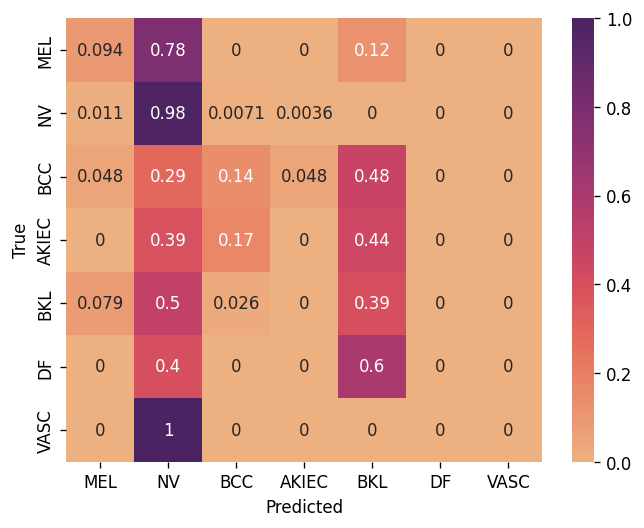

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

import datasets
from models import CustomModel
import train
import numpy as np

torch.manual_seed(42)

NUM_EPOCHS = 5
BATCH_SIZE = 64

# Create datasets/loaders
# TODO Task 1b - Create the data loaders from LesionDatasets
train_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/train.csv')
val_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/val.csv')




# TODO Task 1d - Account for data issues, if applicable
train_ML_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["MEL"]))) / len(train_dataset.labels_fname["MEL"])
train_NV_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["NV"]))) / len(train_dataset.labels_fname["NV"])
train_BCC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["BCC"]))) / len(train_dataset.labels_fname["BCC"])
train_AKIEC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["AKIEC"]))) / len(train_dataset.labels_fname["AKIEC"])
train_BKL_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["BKL"]))) / len(train_dataset.labels_fname["BKL"])
train_DF_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["DF"]))) / len(train_dataset.labels_fname["DF"])
train_VASC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["VASC"]))) / len(train_dataset.labels_fname["VASC"])

print("Train data - ML proportion:", "{:.3f}".format(train_ML_proportion), "NV proportion:", "{:.3f}".format(train_NV_proportion), "BCC proportion:", "{:.3f}".format(train_BCC_proportion), "AKIEC proportion:",
      "{:.3f}".format(train_AKIEC_proportion), "BKL proportion:", "{:.3f}".format(train_BKL_proportion), "DF proportion:", "{:.3f}".format(train_DF_proportion), "VASC proportion:", "{:.3f}".format(train_VASC_proportion))

ML_weight = 1 - train_ML_proportion
NV_weight = 1 - train_NV_proportion
BCC_weight = 1 - train_BCC_proportion
AKIEC_weight = 1 - train_AKIEC_proportion
BKL_weight = 1 - train_BKL_proportion
DF_weight = 1 - train_DF_proportion
VASC_weight = 1 - train_VASC_proportion

weights = []
for i in train_dataset.labels_fname:

  if i == 0:
    weights.append(ML_weight)

  elif i == 1:
    weights.append(NV_weight)

  elif i == 2:
    weights.append(BCC_weight)

  elif i == 3:
    weights.append(AKIEC_weight)

  elif i == 4:
    weights.append(BKL_weight)

  elif i == 5:
    weights.append(DF_weight)

  else:
    weights.append(VASC_weight)


sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(train_dataset))
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


# Instantiate model, optimizer and criterion
# TODO Task 1c - Make an instance of your model
#model = CNNModel()

#model = construct_resnet18()

model = CustomModel()





# TODO Task 1d - Account for data issues, if applicable



optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Train model
# TODO Task 1c: Set ident_str to a string that identifies this particular
#               training run. Note this line in the training code
#                     exp_name = f"{model.__class__.__name__}_{ident_str}"
#               So it means the the model class name is already included in the
#               exp_name string. You can consider adding other information
#               particular to this training run, e.g. learning rate (lr) used,
#               augmentation (aug) used or not, etc.

train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE3001 Assignment Task 1",
                  ident_str= "task custom run")

Train data - ML proportion: 0.089 NV proportion: 0.683 BCC proportion: 0.050 AKIEC proportion: 0.038 BKL proportion: 0.113 DF proportion: 0.012 VASC proportion: 0.015


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MeanMetric was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassAccuracy was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassRecall was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)


Accuracy_train,▁▄▆▇█
Accuracy_val,▁▂▅▇█
Loss_train,█▄▂▁
Loss_val,█▃▂▂▁
Rec_train,▁▄▆▇█
UAR_val,▁▂▅▇█
Accuracy_train,0.83195
Accuracy_val,0.70496
Loss_train,0.22039
Loss_val,0.40525
Rec_train,0.83195


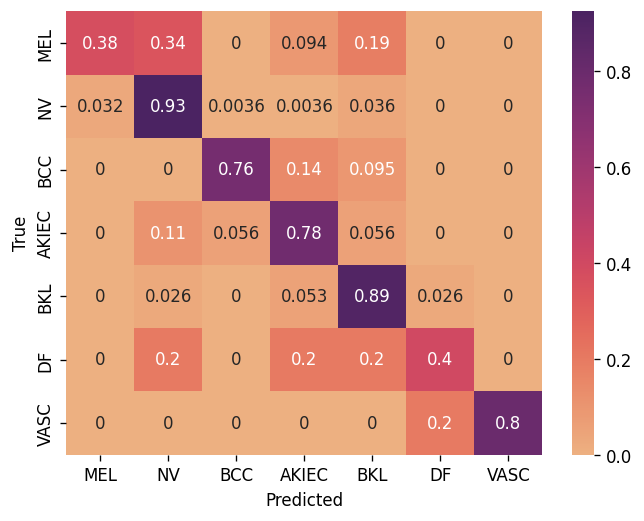

In [ ]:
#model 1
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

import datasets
from models import construct_resnet18
import train
import numpy as np

torch.manual_seed(42)

NUM_EPOCHS = 5
BATCH_SIZE = 64

# Create datasets/loaders
# TODO Task 1b - Create the data loaders from LesionDatasets
train_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/train.csv')
val_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/val.csv')




# TODO Task 1d - Account for data issues, if applicable
train_ML_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["MEL"]))) / len(train_dataset.labels_fname["MEL"])
train_NV_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["NV"]))) / len(train_dataset.labels_fname["NV"])
train_BCC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["BCC"]))) / len(train_dataset.labels_fname["BCC"])
train_AKIEC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["AKIEC"]))) / len(train_dataset.labels_fname["AKIEC"])
train_BKL_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["BKL"]))) / len(train_dataset.labels_fname["BKL"])
train_DF_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["DF"]))) / len(train_dataset.labels_fname["DF"])
train_VASC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["VASC"]))) / len(train_dataset.labels_fname["VASC"])

print("Train data - ML proportion:", "{:.3f}".format(train_ML_proportion), "NV proportion:", "{:.3f}".format(train_NV_proportion), "BCC proportion:", "{:.3f}".format(train_BCC_proportion), "AKIEC proportion:",
      "{:.3f}".format(train_AKIEC_proportion), "BKL proportion:", "{:.3f}".format(train_BKL_proportion), "DF proportion:", "{:.3f}".format(train_DF_proportion), "VASC proportion:", "{:.3f}".format(train_VASC_proportion))

ML_weight = 1 - train_ML_proportion
NV_weight = 1 - train_NV_proportion
BCC_weight = 1 - train_BCC_proportion
AKIEC_weight = 1 - train_AKIEC_proportion
BKL_weight = 1 - train_BKL_proportion
DF_weight = 1 - train_DF_proportion
VASC_weight = 1 - train_VASC_proportion

weights = []
for i in train_dataset.labels_fname:

  if i == 0:
    weights.append(ML_weight)

  elif i == 1:
    weights.append(NV_weight)

  elif i == 2:
    weights.append(BCC_weight)

  elif i == 3:
    weights.append(AKIEC_weight)

  elif i == 4:
    weights.append(BKL_weight)

  elif i == 5:
    weights.append(DF_weight)

  else:
    weights.append(VASC_weight)


sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(train_dataset))
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


# Instantiate model, optimizer and criterion
# TODO Task 1c - Make an instance of your model
#model = CNNModel()

model = construct_resnet18()





# TODO Task 1d - Account for data issues, if applicable



optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Train model
# TODO Task 1c: Set ident_str to a string that identifies this particular
#               training run. Note this line in the training code
#                     exp_name = f"{model.__class__.__name__}_{ident_str}"
#               So it means the the model class name is already included in the
#               exp_name string. You can consider adding other information
#               particular to this training run, e.g. learning rate (lr) used,
#               augmentation (aug) used or not, etc.

train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE3001 Assignment Task 1",
                  ident_str= "resnet18 unfrozen weight run")

Train data - ML proportion: 0.089 NV proportion: 0.683 BCC proportion: 0.050 AKIEC proportion: 0.038 BKL proportion: 0.113 DF proportion: 0.012 VASC proportion: 0.015


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MeanMetric was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassAccuracy was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassRecall was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)


Accuracy_train,▁▇█▇█
Accuracy_val,▁█▅▇▂
Loss_train,█▃▂▁
Loss_val,█▅▁▂▁
Rec_train,▁▇█▇█
UAR_val,▁█▅▇▂
Accuracy_train,0.18325
Accuracy_val,0.15475
Loss_train,0.95927
Loss_val,0.88882
Rec_train,0.18325


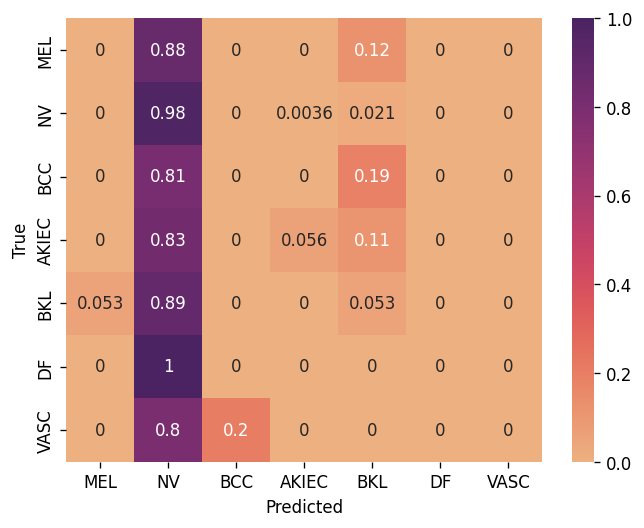

In [14]:
#model 2
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

import datasets
from models import CNNModel
import train
import numpy as np

torch.manual_seed(42)

NUM_EPOCHS = 5
BATCH_SIZE = 64

# Create datasets/loaders
# TODO Task 1b - Create the data loaders from LesionDatasets
train_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/train.csv')
val_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/val.csv')




# TODO Task 1d - Account for data issues, if applicable
train_ML_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["MEL"]))) / len(train_dataset.labels_fname["MEL"])
train_NV_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["NV"]))) / len(train_dataset.labels_fname["NV"])
train_BCC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["BCC"]))) / len(train_dataset.labels_fname["BCC"])
train_AKIEC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["AKIEC"]))) / len(train_dataset.labels_fname["AKIEC"])
train_BKL_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["BKL"]))) / len(train_dataset.labels_fname["BKL"])
train_DF_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["DF"]))) / len(train_dataset.labels_fname["DF"])
train_VASC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["VASC"]))) / len(train_dataset.labels_fname["VASC"])

print("Train data - ML proportion:", "{:.3f}".format(train_ML_proportion), "NV proportion:", "{:.3f}".format(train_NV_proportion), "BCC proportion:", "{:.3f}".format(train_BCC_proportion), "AKIEC proportion:",
      "{:.3f}".format(train_AKIEC_proportion), "BKL proportion:", "{:.3f}".format(train_BKL_proportion), "DF proportion:", "{:.3f}".format(train_DF_proportion), "VASC proportion:", "{:.3f}".format(train_VASC_proportion))

ML_weight = 1 - train_ML_proportion
NV_weight = 1 - train_NV_proportion
BCC_weight = 1 - train_BCC_proportion
AKIEC_weight = 1 - train_AKIEC_proportion
BKL_weight = 1 - train_BKL_proportion
DF_weight = 1 - train_DF_proportion
VASC_weight = 1 - train_VASC_proportion

weights = []
for i in train_dataset.labels_fname:

  if i == 0:
    weights.append(ML_weight)

  elif i == 1:
    weights.append(NV_weight)

  elif i == 2:
    weights.append(BCC_weight)

  elif i == 3:
    weights.append(AKIEC_weight)

  elif i == 4:
    weights.append(BKL_weight)

  elif i == 5:
    weights.append(DF_weight)

  else:
    weights.append(VASC_weight)


sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(train_dataset))
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


# Instantiate model, optimizer and criterion
# TODO Task 1c - Make an instance of your model
model = CNNModel()

#model = construct_resnet18()





# TODO Task 1d - Account for data issues, if applicable



optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Train model
# TODO Task 1c: Set ident_str to a string that identifies this particular
#               training run. Note this line in the training code
#                     exp_name = f"{model.__class__.__name__}_{ident_str}"
#               So it means the the model class name is already included in the
#               exp_name string. You can consider adding other information
#               particular to this training run, e.g. learning rate (lr) used,
#               augmentation (aug) used or not, etc.

train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE3001 Assignment Task 1",
                  ident_str= "Simple CNN modification_1 run")

Train data - ML proportion: 0.089 NV proportion: 0.683 BCC proportion: 0.050 AKIEC proportion: 0.038 BKL proportion: 0.113 DF proportion: 0.012 VASC proportion: 0.015


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 137MB/s]


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MeanMetric was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassAccuracy was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassRecall was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)


Accuracy_train,▁▄▅▇█
Accuracy_val,▁▁▃▅█
Loss_train,█▄▂▁
Loss_val,█▂▂▂▁
Rec_train,▁▄▅▇█
UAR_val,▁▁▃▅█
Accuracy_train,0.43961
Accuracy_val,0.44318
Loss_train,0.66491
Loss_val,0.68679
Rec_train,0.43961


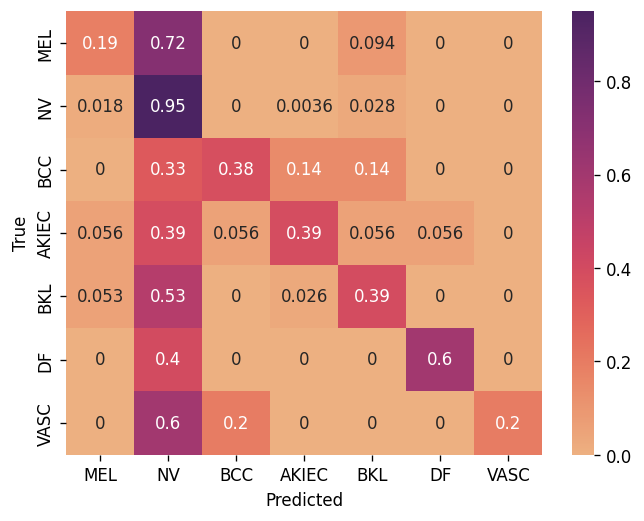

In [15]:
#model 4
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

import datasets
from models import construct_resnet18
import train
import numpy as np

torch.manual_seed(42)

NUM_EPOCHS = 5
BATCH_SIZE = 64

# Create datasets/loaders
# TODO Task 1b - Create the data loaders from LesionDatasets
train_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/train.csv')
val_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/val.csv')




# TODO Task 1d - Account for data issues, if applicable
train_ML_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["MEL"]))) / len(train_dataset.labels_fname["MEL"])
train_NV_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["NV"]))) / len(train_dataset.labels_fname["NV"])
train_BCC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["BCC"]))) / len(train_dataset.labels_fname["BCC"])
train_AKIEC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["AKIEC"]))) / len(train_dataset.labels_fname["AKIEC"])
train_BKL_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["BKL"]))) / len(train_dataset.labels_fname["BKL"])
train_DF_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["DF"]))) / len(train_dataset.labels_fname["DF"])
train_VASC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["VASC"]))) / len(train_dataset.labels_fname["VASC"])

print("Train data - ML proportion:", "{:.3f}".format(train_ML_proportion), "NV proportion:", "{:.3f}".format(train_NV_proportion), "BCC proportion:", "{:.3f}".format(train_BCC_proportion), "AKIEC proportion:",
      "{:.3f}".format(train_AKIEC_proportion), "BKL proportion:", "{:.3f}".format(train_BKL_proportion), "DF proportion:", "{:.3f}".format(train_DF_proportion), "VASC proportion:", "{:.3f}".format(train_VASC_proportion))

ML_weight = 1 - train_ML_proportion
NV_weight = 1 - train_NV_proportion
BCC_weight = 1 - train_BCC_proportion
AKIEC_weight = 1 - train_AKIEC_proportion
BKL_weight = 1 - train_BKL_proportion
DF_weight = 1 - train_DF_proportion
VASC_weight = 1 - train_VASC_proportion

weights = []
for i in train_dataset.labels_fname:

  if i == 0:
    weights.append(ML_weight)

  elif i == 1:
    weights.append(NV_weight)

  elif i == 2:
    weights.append(BCC_weight)

  elif i == 3:
    weights.append(AKIEC_weight)

  elif i == 4:
    weights.append(BKL_weight)

  elif i == 5:
    weights.append(DF_weight)

  else:
    weights.append(VASC_weight)


sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(train_dataset))
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


# Instantiate model, optimizer and criterion
# TODO Task 1c - Make an instance of your model
#model = CNNModel()

model = construct_resnet18()





# TODO Task 1d - Account for data issues, if applicable



optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Train model
# TODO Task 1c: Set ident_str to a string that identifies this particular
#               training run. Note this line in the training code
#                     exp_name = f"{model.__class__.__name__}_{ident_str}"
#               So it means the the model class name is already included in the
#               exp_name string. You can consider adding other information
#               particular to this training run, e.g. learning rate (lr) used,
#               augmentation (aug) used or not, etc.

train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE3001 Assignment Task 1",
                  ident_str= "Simple CNN modification_2 run")

Train data - ML proportion: 0.089 NV proportion: 0.683 BCC proportion: 0.050 AKIEC proportion: 0.038 BKL proportion: 0.113 DF proportion: 0.012 VASC proportion: 0.015


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MeanMetric was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassAccuracy was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric MulticlassRecall was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)


Accuracy_train,▁▆▇▇█
Accuracy_val,▁▄▅▅█
Loss_train,█▃▂▁
Loss_val,█▂▁▁▁
Rec_train,▁▆▇▇█
UAR_val,▁▄▅▅█
Accuracy_train,0.24383
Accuracy_val,0.22832
Loss_train,0.91648
Loss_val,0.90898
Rec_train,0.24383


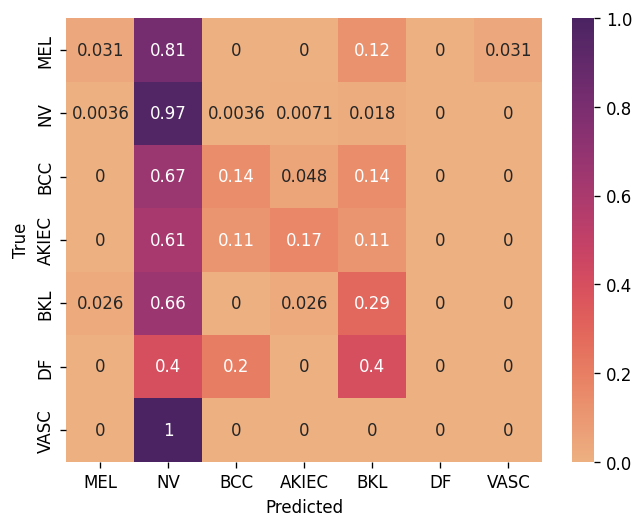

In [16]:
#model 5
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

import datasets
from models import CNNModel
import train
import numpy as np

torch.manual_seed(42)

NUM_EPOCHS = 5
BATCH_SIZE = 64

# Create datasets/loaders
# TODO Task 1b - Create the data loaders from LesionDatasets
train_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/train.csv')
val_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/val.csv')




# TODO Task 1d - Account for data issues, if applicable
train_ML_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["MEL"]))) / len(train_dataset.labels_fname["MEL"])
train_NV_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["NV"]))) / len(train_dataset.labels_fname["NV"])
train_BCC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["BCC"]))) / len(train_dataset.labels_fname["BCC"])
train_AKIEC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["AKIEC"]))) / len(train_dataset.labels_fname["AKIEC"])
train_BKL_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["BKL"]))) / len(train_dataset.labels_fname["BKL"])
train_DF_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["DF"]))) / len(train_dataset.labels_fname["DF"])
train_VASC_proportion = len(torch.nonzero(torch.Tensor(train_dataset.labels_fname["VASC"]))) / len(train_dataset.labels_fname["VASC"])

print("Train data - ML proportion:", "{:.3f}".format(train_ML_proportion), "NV proportion:", "{:.3f}".format(train_NV_proportion), "BCC proportion:", "{:.3f}".format(train_BCC_proportion), "AKIEC proportion:",
      "{:.3f}".format(train_AKIEC_proportion), "BKL proportion:", "{:.3f}".format(train_BKL_proportion), "DF proportion:", "{:.3f}".format(train_DF_proportion), "VASC proportion:", "{:.3f}".format(train_VASC_proportion))

ML_weight = 1 - train_ML_proportion
NV_weight = 1 - train_NV_proportion
BCC_weight = 1 - train_BCC_proportion
AKIEC_weight = 1 - train_AKIEC_proportion
BKL_weight = 1 - train_BKL_proportion
DF_weight = 1 - train_DF_proportion
VASC_weight = 1 - train_VASC_proportion

weights = []
for i in train_dataset.labels_fname:

  if i == 0:
    weights.append(ML_weight)

  elif i == 1:
    weights.append(NV_weight)

  elif i == 2:
    weights.append(BCC_weight)

  elif i == 3:
    weights.append(AKIEC_weight)

  elif i == 4:
    weights.append(BKL_weight)

  elif i == 5:
    weights.append(DF_weight)

  else:
    weights.append(VASC_weight)


sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(train_dataset))
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


# Instantiate model, optimizer and criterion
# TODO Task 1c - Make an instance of your model
model = CNNModel()

#model = construct_resnet18()





# TODO Task 1d - Account for data issues, if applicable



optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Train model
# TODO Task 1c: Set ident_str to a string that identifies this particular
#               training run. Note this line in the training code
#                     exp_name = f"{model.__class__.__name__}_{ident_str}"
#               So it means the the model class name is already included in the
#               exp_name string. You can consider adding other information
#               particular to this training run, e.g. learning rate (lr) used,
#               augmentation (aug) used or not, etc.

train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE3001 Assignment Task 1",
                  ident_str= "Simple CNN modification_3 run")